### Creating DataFrames:

The purpose of this notebook is generate a Train Test and Validation DataFrame containing the file paths for the corresponding datafiles and The sentecnes from the text files that match them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import os

In [2]:
y, sr = librosa.load('/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Train/train-clean-100/1624/168623/1624-168623-0003.flac')

In [3]:
y

array([ 1.0459040e-03,  1.1131088e-03,  8.6204050e-04, ...,
       -4.3476470e-05, -4.1983909e-05, -5.4221950e-05], dtype=float32)

In [4]:
len(y)

338247

In [5]:
sr

22050

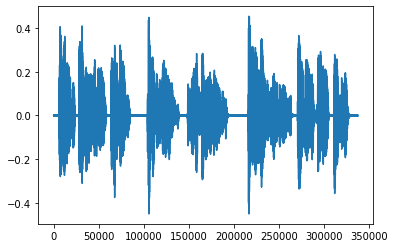

In [6]:
plt.plot(y)

In [7]:
path = '/home/houston/Desktop/General_Assembly/CapStone/Phase 2'
tdt = '/Train'
folder = '/train-clean-100'
p1 = '/1624'
p2 = '/168623'

fullpath = path + tdt + folder + p1 + p2

In [10]:
names_list = []

sentences = []


path = '/home/houston/Desktop/General_Assembly/CapStone/Phase 2'
tdt = '/Train'

for folder in os.listdir(path + tdt):
    
    for p1 in os.listdir(path + tdt + '/' + folder):
        
        for p2 in os.listdir(path + tdt + '/' + folder + '/' +  p1):

            try:
            
                fullpath = path + tdt + '/' + folder + '/' + p1 + '/' + p2 

                text = open(f'{fullpath}/{p1}-{p2}.trans.txt', 'r')
                trans = text.read().split('\n')
                labels =[i.split() for i in trans]


                names = []
                for i in range(len(labels)-1):
                    names.append(fullpath + '/' + str(labels[i][0]) + '.flac')

                names_list.append(names)

                recording = []
                for i in range(len(labels)-1):
                    recording.append(labels[i][1:])
                sentences.append(recording)
            except: 
                pass

In [11]:
df = pd.DataFrame()
df['File'] = names_list
df['Sentence'] = sentences

In [12]:
train = df

In [15]:
names_list = []

sentences = []


path = '/home/houston/Desktop/General_Assembly/CapStone/Phase 2'
tdt = '/Test'

for folder in os.listdir(path + tdt):
    
    for p1 in os.listdir(path + tdt + '/' + folder):
        
        for p2 in os.listdir(path + tdt + '/' + folder + '/' +  p1):

            try:
            
                fullpath = path + tdt + '/' + folder + '/' + p1 + '/' + p2

                text = open(f'{fullpath}/{p1}-{p2}.trans.txt', 'r')
                trans = text.read().split('\n')
                labels =[i.split() for i in trans]


                names = []
                for i in range(len(labels)-1):
                    names.append(fullpath + '/' + str(labels[i][0]) + '.flac')

                names_list.append(names)

                recording = []
                for i in range(len(labels)-1):
                    recording.append(labels[i][1:])
                sentences.append(recording)
            except: 
                pass

In [16]:
df = pd.DataFrame()
df['File'] = names_list
df['Sentence'] = sentences

In [17]:
test = df

In [19]:
test.loc[0]['File']

['/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0000.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0001.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0002.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0003.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0004.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0005.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0006.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0007.flac',
 '/home/houston/Desktop/General_Assembly/CapStone/Phase 2/Test/test-clean/8230/279154/8230-279154-0008.flac',
 '/home/ho

In [20]:
names_list = []

sentences = []


path = '/home/houston/Desktop/General_Assembly/CapStone/Phase 2'
tdt = '/Dev'

for folder in os.listdir(path + tdt):
    
    for p1 in os.listdir(path + tdt + '/' + folder):
        
        for p2 in os.listdir(path + tdt + '/' + folder + '/' +  p1):

            try:
            
                fullpath = path + tdt + '/' + folder + '/' + p1 + '/' + p2

                text = open(f'{fullpath}/{p1}-{p2}.trans.txt', 'r')
                trans = text.read().split('\n')
                labels =[i.split() for i in trans]


                names = []
                for i in range(len(labels)-1):
                    names.append(fullpath + '/' +  str(labels[i][0]) + '.flac')

                names_list.append(names)

                recording = []
                for i in range(len(labels)-1):
                    recording.append(labels[i][1:])
                sentences.append(recording)
            except: 
                pass

In [21]:
df = pd.DataFrame()
df['File'] = names_list
df['Sentence'] = sentences

In [22]:
dev = df

In [23]:
root_train = pd.DataFrame()

for i, j in train.iterrows():
    df = pd.DataFrame()
    df['File'] = train.loc[i][0]
    df['Sentece'] = train.loc[i][1]
    
    root_train = pd.concat([root_train, df])

In [24]:
root_train.reset_index(inplace=True)

In [25]:
root_test = pd.DataFrame()

for i, j in test.iterrows():
    df = pd.DataFrame()
    df['File'] = test.loc[i][0]
    df['Sentece'] = test.loc[i][1]
    
    root_test = pd.concat([root_test, df])
    
root_test.reset_index(inplace=True)

In [26]:
root_dev = pd.DataFrame()

for i, j in dev.iterrows():
    df = pd.DataFrame()
    df['File'] = dev.loc[i][0]
    df['Sentece'] = dev.loc[i][1]
    
    root_dev = pd.concat([root_dev, df])
    
root_dev.reset_index(inplace=True)

In [27]:
root_test

,index,File,Sentece
0,0,/home/houston/Desktop/General_Assembly/CapSton...,"[THE, ANALYSIS, OF, KNOWLEDGE, WILL, OCCUPY, U..."
1,1,/home/houston/Desktop/General_Assembly/CapSton...,"[WHAT, IS, CALLED, PERCEPTION, DIFFERS, FROM, ..."
2,2,/home/houston/Desktop/General_Assembly/CapSton...,"[WHETHER, OR, NOT, THIS, PRINCIPLE, IS, LIABLE..."
3,3,/home/houston/Desktop/General_Assembly/CapSton...,"[AND, WHAT, SORT, OF, EVIDENCE, IS, LOGICALLY,..."
4,4,/home/houston/Desktop/General_Assembly/CapSton...,"[THERE, IS, NO, LOGICAL, IMPOSSIBILITY, IN, TH..."
...,...,...,...
5554,53,/home/houston/Desktop/General_Assembly/CapSton...,"[THERE, WAS, A, RATTLE, OF, COINS, ON, THE, MA..."
5555,54,/home/houston/Desktop/General_Assembly/CapSton...,"[IT'S, IT'S, AN, ODD, COIN, AN, OLD, ROMAN, ON..."
5556,55,/home/houston/Desktop/General_Assembly/CapSton...,"[I, WENT, OVER, THEM, THE, OTHER, DAY, AND, NO..."
5557,56,/home/houston/Desktop/General_Assembly/CapSton...,"[THAT, WAS, HERS, WENT, ON, THE, JEWELER]"


In [28]:
root_dev

,index,File,Sentece
0,0,/home/houston/Desktop/General_Assembly/CapSton...,"[A, MAN, SAID, TO, THE, UNIVERSE, SIR, I, EXIST]"
1,1,/home/houston/Desktop/General_Assembly/CapSton...,"[SWEAT, COVERED, BRION'S, BODY, TRICKLING, INT..."
2,2,/home/houston/Desktop/General_Assembly/CapSton...,"[THE, CUT, ON, HIS, CHEST, STILL, DRIPPING, BL..."
3,3,/home/houston/Desktop/General_Assembly/CapSton...,"[HIS, INSTANT, OF, PANIC, WAS, FOLLOWED, BY, A..."
4,4,/home/houston/Desktop/General_Assembly/CapSton...,"[ONE, MINUTE, A, VOICE, SAID, AND, THE, TIME, ..."
...,...,...,...
5562,31,/home/houston/Desktop/General_Assembly/CapSton...,"[WILLIAMS, HAD, TO, CONFESS, HE, WAS, BEATEN, ..."
5563,32,/home/houston/Desktop/General_Assembly/CapSton...,"[THE, BILGE, PUMP, IS, DEPENDENT, ON, THE, MAI..."
5564,33,/home/houston/Desktop/General_Assembly/CapSton...,"[ON, ONE, OCCASION, I, WAS, WAIST, DEEP, WHEN,..."
5565,34,/home/houston/Desktop/General_Assembly/CapSton...,"[THE, AFTERGUARD, WERE, ORGANISED, IN, TWO, PA..."


In [29]:
root_train.to_csv('./Directories/Train.csv')
root_test.to_csv('./Directories/Test.csv')
root_dev.to_csv('./Directories/Dev.csv')